#Análisis de un cultivo de moscas en el champiñón

Precisión del árbol de decisión (presencia de moscas): 0.99


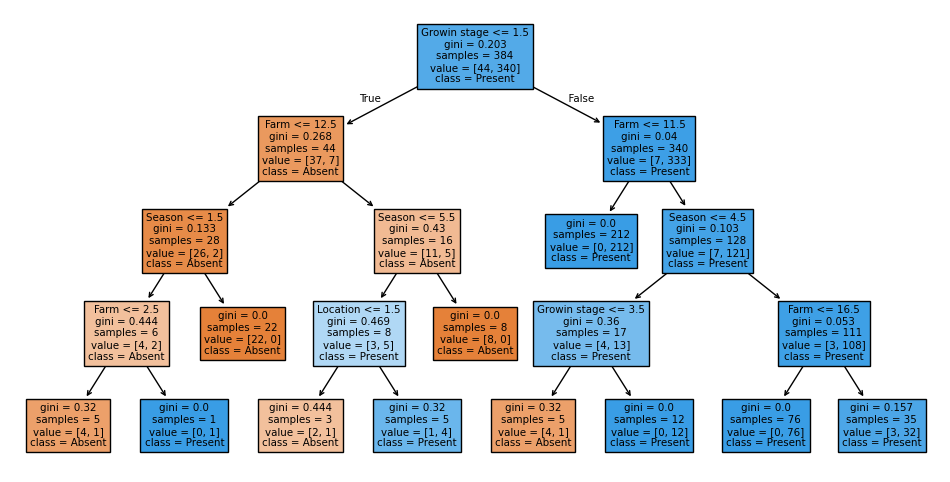

Error cuadrático medio (predicción de impacto): 2703.19


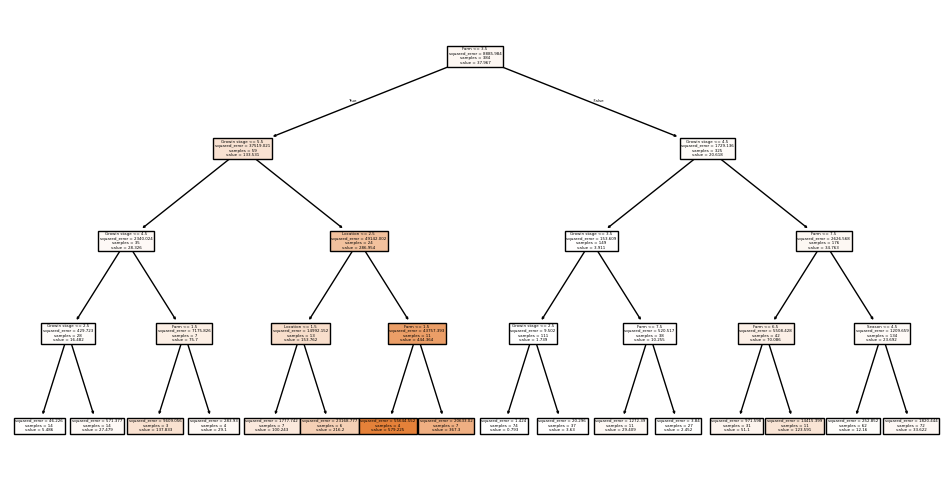

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

# Cargar el dataset (cambiar la ruta si es necesario)
file_path = "Adult_phorids_CIES_IRTA.csv"
df = pd.read_csv(file_path, sep=";")

# 🔹 PREPROCESAMIENTO 🔹
# Convertir 'occurenceStatus' a valores numéricos (0 = Absent, 1 = Present)
df["occurenceStatus"] = df["occurenceStatus"].map({"absent": 0, "present": 1})

# Convertir 'Value' a número y manejar nulos
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
df.dropna(inplace=True)

# Seleccionar variables predictoras y objetivo
X = df[["Farm", "Season", "Growin stage", "Location"]]
y_status = df["occurenceStatus"]
y_value = df["Value"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)
X_train, X_test, y_train_value, y_test_value = train_test_split(X, y_value, test_size=0.2, random_state=42)

# 🔹 ÁRBOL DE DECISIÓN PARA PRESENCIA DE MOSCAS 🔹
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train_status)

# Predicción y evaluación
y_pred_status = clf.predict(X_test)
accuracy = accuracy_score(y_test_status, y_pred_status)
print(f"Precisión del árbol de decisión (presencia de moscas): {accuracy:.2f}")

# Visualizar el árbol
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Absent", "Present"], filled=True)
plt.show()

# 🔹 REGRESIÓN PARA IMPACTO 🔹
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train_value)

# Predicción y evaluación
y_pred_value = reg.predict(X_test)
mse = mean_squared_error(y_test_value, y_pred_value)
print(f"Error cuadrático medio (predicción de impacto): {mse:.2f}")

# Visualizar el árbol de regresión
plt.figure(figsize=(12, 6))
tree.plot_tree(reg, feature_names=X.columns, filled=True)
plt.show()



#Modelo de regresion

Error cuadrático medio (predicción de impacto): 2703.19


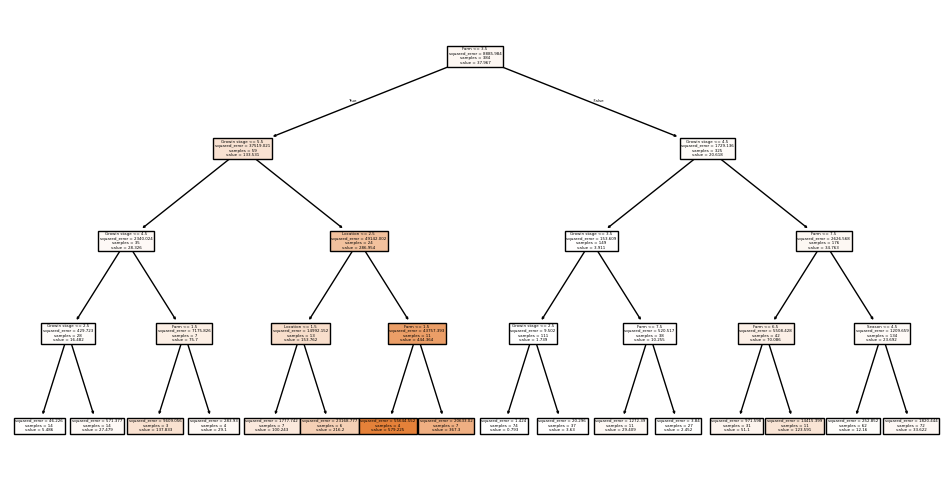

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

# Definir las variables predictoras y la variable objetivo
X = df[["Farm", "Season", "Growin stage", "Location"]]
y_value = df["Value"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train_value, y_test_value = train_test_split(X, y_value, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train_value)

# Hacer predicciones
y_pred_value = reg.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test_value, y_pred_value)
print(f"Error cuadrático medio (predicción de impacto): {mse:.2f}")

# Visualizar el árbol de regresión
plt.figure(figsize=(12, 6))
tree.plot_tree(reg, feature_names=X.columns, filled=True)
plt.show()


##Precisión en porcentaje y las métricas adicionales

In [8]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset (asegúrate de cargarlo correctamente en Colab)
df = pd.read_csv("Adult_phorids_CIES_IRTA.csv", delimiter=";")

# Convertir la variable objetivo a valores numéricos (1 = presente, 0 = ausente)
df['occurenceStatus'] = df['occurenceStatus'].apply(lambda x: 1 if x == 'present' else 0)

# Seleccionar las variables predictoras y la variable objetivo
X = df[['Farm', 'Season', 'Growin stage', 'Location']]
y = df['occurenceStatus']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular precisión en porcentaje
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar métricas adicionales (Precision, Recall, F1-score)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Precisión del modelo: 92.86%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.98      0.94      0.96        88

    accuracy                           0.93        98
   macro avg       0.80      0.87      0.83        98
weighted avg       0.94      0.93      0.93        98



##Gráficas

###Matriz de confusión

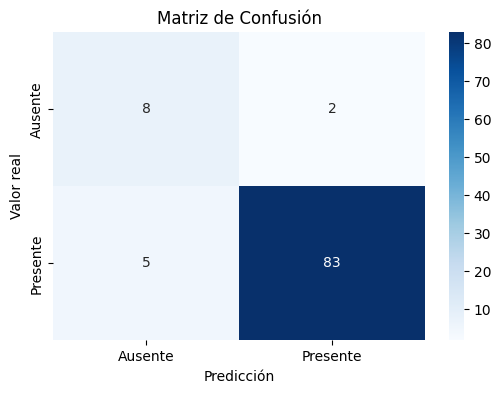

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ausente", "Presente"], yticklabels=["Ausente", "Presente"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


La matriz de confusión es una tabla que muestra cuántas predicciones fueron correctas o incorrectas en cada categoría. Se interpreta así:

	Predicho: Ausente	Predicho: Presente
Real: Ausente	Verdaderos Negativos (TN) ✅

Falsos Positivos (FP) ❌

Real: Presente	Falsos Negativos (FN) ❌

Verdaderos Positivos (TP) ✅

 Valores altos en la diagonal (TN y TP) → El modelo está acertando bien.

🔹 Valores altos fuera de la diagonal (FP y FN) → El modelo está cometiendo errores.

🔹 Muchos Falsos Positivos (FP) → Está detectando moscas donde no hay.

🔹 Muchos Falsos Negativos (FN) → Está fallando al detectar moscas reales.

###Distribución de la Presencia de Moscas

<ipython-input-10-e8591d7e1ce2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['occurenceStatus'], palette="pastel")


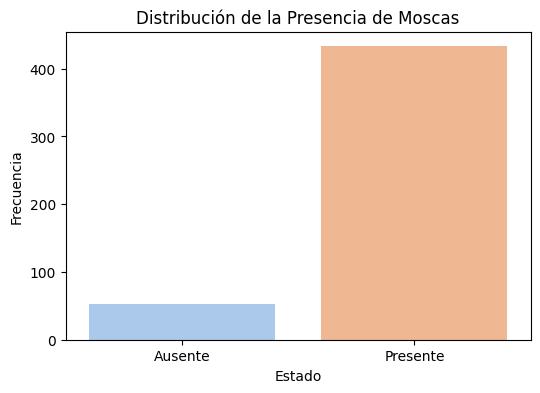

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['occurenceStatus'], palette="pastel")
plt.xticks(ticks=[0,1], labels=["Ausente", "Presente"])
plt.title("Distribución de la Presencia de Moscas")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.show()


Este gráfico de barras muestra cuántas veces se registraron cultivos con moscas ("Presente") y sin moscas ("Ausente") en el dataset.

🔹 Si hay muchos más casos de "Ausente" que "Presente", el dataset está desequilibrado, lo que puede afectar al modelo.
🔹 Si los valores están balanceados, el modelo tendrá datos más equitativos para aprender.

###Importancia de las Variables en el Modelo

<ipython-input-11-5847daeadd0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


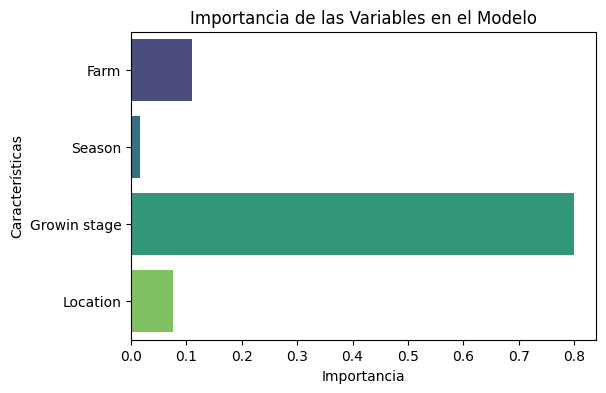

In [11]:
# Obtener importancia de las variables
importances = model.feature_importances_
features = X.columns

# Graficar la importancia de cada variable
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Variables en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


Muestra qué variables son más importantes para el modelo a la hora de predecir la presencia de moscas.

🔹 Variables con valores altos → Son las más influyentes en la predicción.

🔹 Variables con valores bajos → Apenas afectan la decisión del modelo.

🔹 Si la variable "Ubicación" tiene alta importancia → La zona influye en la aparición de moscas.

🔹 Si la variable "Etapa de crecimiento" tiene alta importancia → Ciertas etapas favorecen la presencia de moscas.